In [40]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt   

In [41]:
db_iris = load_iris() # este datasets ya es propio de SKlearn, por eso no lo traemos de Github o de Google Chrom

In [42]:
print(db_iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [44]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) 
df_iris['target'] = db_iris.target 
df_iris.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 )

In [46]:
arbol_clasi = DecisionTreeClassifier(max_depth = 2, random_state = 0)


In [47]:
arbol_clasi.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
print(X_test.iloc[0])
print(Y_test.iloc[0])
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))
arbol_clasi.predict(X_test[0:10])

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64
2


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [49]:
accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 89.47368421052632 %


In [50]:
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

In [51]:
"""
import cv2
import cv2 as cv

img = cv2.imread('tree_iris.png')
#Colab no permite mostrar en ventana emergente de cv2
cv2.imshow('Arbol de decisiones',img)
"""

"\nimport cv2\nimport cv2 as cv\n\nimg = cv2.imread('tree_iris.png')\n#Colab no permite mostrar en ventana emergente de cv2\ncv2.imshow('Arbol de decisiones',img)\n"

In [52]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.556
2,petal length (cm),0.444
0,sepal length (cm),0.000
1,sepal width (cm),0.000


# Nueva sección

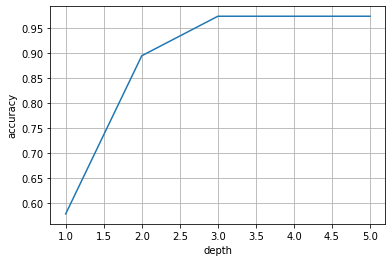

In [53]:
max_depth_lista = list(range(1, 6))
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [54]:
db_iris = load_iris()

df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names) 
df_iris['target'] = db_iris.target

X_train, X_test, Y_train, Y_test = train_test_split( df_iris[db_iris.feature_names], df_iris['target'], random_state=0 ) 

arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(X_train, Y_train)

accuary = arbol_clasi.score(X_test, Y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 97.36842105263158 %


In [55]:
class_names_list=list(['setosa','versicolor','virginica'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt                         

from sklearn.tree import DecisionTreeClassifier        
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [59]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv", encoding='utf-8')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [61]:
le =preprocessing.LabelEncoder()


In [62]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
data['mes'] = data['mes'].map(mes)
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)
data['trabajo'] = le.fit_transform(data['trabajo'])
data['estado_civil '] = le.fit_transform(data['estado_civil '])
data['educacion'] = le.fit_transform(data['educacion'])
data['credito_sin_pago'] = le.fit_transform(data['credito_sin_pago'])
data['prestamo_vivienda'] = le.fit_transform(data['prestamo_vivienda'])
data['prestamo_personal'] = le.fit_transform(data['prestamo_personal'])
data['contacto'] = le.fit_transform(data['contacto'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

In [64]:
X = data.drop('si_no', axis=1)
y = data.si_no

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0 )

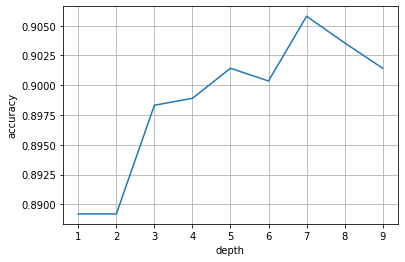

In [65]:
max_depth_lista = list(range(1, 10))
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, y_train)
    score = arbol_clasi.score(X_test, y_test)
    accuracy.append(score)
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [66]:
arbol_clasi = DecisionTreeClassifier(max_depth = 7, random_state = 0)
arbol_clasi.fit(X_train, y_train)
accuary = arbol_clasi.score(X_test, y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 90.57978051859766 %


In [67]:
X.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'],
      dtype='object')

In [69]:
class_names_list=list(['edad','trabajo','estado_civil ','educacion','total_hijos',
                       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
                       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
                       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
                       'anterior_contacto', 'numero_empleados'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

names = []
for i in range(len(X.keys())):
  print(X.keys()[i])
  names.append(X.keys()[i])

print(names)

dot_data = export_graphviz(arbol_clasi,feature_names=names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('mercado_bancario.png')

edad
trabajo
estado_civil 
educacion
total_hijos
credito_sin_pago
prestamo_vivienda
prestamo_personal
valor_prestamo
dias_ultimo_pago
tarjetas_credito
contacto
mes
dia_semana
duracion_ultimo_contacto
dias_ultimo_contacto
anterior_contacto
numero_empleados
['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos', 'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal', 'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto', 'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto', 'anterior_contacto', 'numero_empleados']


True